In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


libraries

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

pre-processing

In [4]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

DIRECTORY = "/content/drive/My Drive/face_mask_data/images"
CATEGORIES = ["with_mask", "without_mask"]

data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
    	img_path = os.path.join(path, img)
    	image = load_img(img_path, target_size=(224, 224))
    	image = img_to_array(image)
    	image = preprocess_input(image)

    	data.append(image)
    	labels.append(category)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


training

In [5]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
	layer.trainable = False
print("start to compile")
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

/tmp/ipython-input-5-282295994.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  baseModel = MobileNetV2(weights="imagenet", include_top=False,


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
start to compile


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


95/95 ━━━━━━━━━━━━━━━━━━━━ 66s 560ms/step - accuracy: 0.7389 - loss: 0.6215 - val_accuracy: 0.9831 - val_loss: 0.1633
Epoch 2/20
 1/95 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.9688 - loss: 0.1687

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9688 - loss: 0.1687 - val_accuracy: 0.9831 - val_loss: 0.1614
Epoch 3/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 56s 380ms/step - accuracy: 0.9524 - loss: 0.1859 - val_accuracy: 0.9883 - val_loss: 0.0833
Epoch 4/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9688 - loss: 0.1226 - val_accuracy: 0.9883 - val_loss: 0.0827
Epoch 5/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 41s 389ms/step - accuracy: 0.9749 - loss: 0.1114 - val_accuracy: 0.9909 - val_loss: 0.0587
Epoch 6/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9062 - loss: 0.1691 - val_accuracy: 0.9883 - val_loss: 0.0587
Epoch 7/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 36s 383ms/step - accuracy: 0.9749 - loss: 0.0891 - val_accuracy: 0.9870 - val_loss: 0.0477
Epoch 8/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0458 - val_accuracy: 0.9870 - val_loss: 0.0476
Epoch 9/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 37s 378ms/step - accuracy: 0.9776 - loss: 0.0743 - val_accuracy: 0.9948 - val_

evaluation

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


              precision    recall  f1-score   support

   with_mask       0.99      0.99      0.99       383
without_mask       0.99      0.99      0.99       384

    accuracy                           0.99       767
   macro avg       0.99      0.99      0.99       767
weighted avg       0.99      0.99      0.99       767

saving final model after training
[INFO] saving face mask detector model...


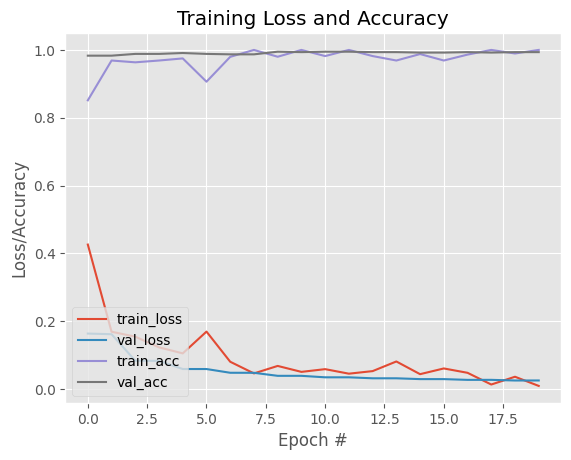

In [7]:
predIdxs = model.predict(testX, batch_size=BS)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

print("saving final model after training")
MODEL_PATH = "/content/drive/My Drive/face_mask_data/face_mask_model.h5"
print("[INFO] saving face mask detector model...")
model.save(MODEL_PATH)

#graph
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [9]:
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from google.colab import files
from google.colab.patches import cv2_imshow

MODEL_PATH = "/content/drive/My Drive/face_mask_data/face_mask_model.h5"
CATEGORIES = ["with_mask", "without_mask"]
TARGET_SIZE = (224, 224)

def load_mask_detection_model(model_path):
    print(f"loading model...")
    try:
        model = load_model(model_path)
        print("successful.")
        return model
    except Exception as e:
        print(f"could not load the model")
        print(f"Error details: {e}")
        return None

def preprocess_frame_for_prediction(frame, target_size=TARGET_SIZE):
    #OpenCV reads in BGR, Keras expects RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image = cv2.resize(frame_rgb, target_size)
    image = img_to_array(image)
    image = preprocess_input(image)
    image = np.expand_dims(image, axis=0)
    return image

def predict_mask_status(model, processed_frame, categories):
    if processed_frame is None:
        return "Error", 0.0

    predictions = model.predict(processed_frame, verbose=0)[0]
    predicted_index = np.argmax(predictions)

    predicted_label = categories[predicted_index]
    confidence = predictions[predicted_index] * 100

    return predicted_label, confidence

#execution block
if __name__ == "__main__":
    if not os.path.exists(os.path.dirname(MODEL_PATH)):
        print(f"Model directory does not exist.")
        try:
            os.makedirs(os.path.dirname(MODEL_PATH))
            print("Directory created.")
        except Exception as e:
            print(f"Failed to create directory: {e}. This might cause issues if the model file is missing.")

    model = load_mask_detection_model(MODEL_PATH)

    if model is None:
        print("Model not loaded")
    else:
        print("\nupload a video file")
        uploaded = files.upload()

        if not uploaded:
            print("no file uploaded")
        else:
            uploaded_video_name = list(uploaded.keys())[0]
            video_path = f"/content/{uploaded_video_name}"

            print(f"Processing video: {video_path}")

            cap = cv2.VideoCapture(video_path)

            if not cap.isOpened():
                print(f"could not open video file: {video_path}")
            else:
                fps = int(cap.get(cv2.CAP_PROP_FPS))
                width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
                height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
                if width <= 0 or height <= 0:
                    print("Invalid video dimensions detected. Using default 640x480 for output.")
                    width, height = 640, 480
                fourcc = cv2.VideoWriter_fourcc(*'mp4v')
                output_video_path = f"/content/output_{uploaded_video_name}"
                out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

                if not out.isOpened():
                    print(f"Could not open output video file for writing: {output_video_path}")
                    out_enabled = False
                else:
                    out_enabled = True
                    print(f"Writing processed video to: {output_video_path}")

                frame_count = 0
                sample_display_frames = 5

                print("starting processing...")
                while True:
                    ret, frame = cap.read()
                    if not ret:
                        break

                    frame_count += 1

                    processed_frame = preprocess_frame_for_prediction(frame)

                    #prediction
                    predicted_label, confidence = predict_mask_status(model, processed_frame, CATEGORIES)

                    text = f"{predicted_label}: {confidence:.2f}%"
                    color = (0, 255, 0) if predicted_label == "with_mask" else (0, 0, 255)

                    cv2.putText(frame, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

                    if out_enabled:
                        out.write(frame)
                print(f"\nprocessing complete")
                cap.release()
                if out_enabled:
                    out.release()

                print(f"output video saved to: {output_video_path}")

loading model...


successful.

upload a video file


Saving test.mp4 to test.mp4
Processing video: /content/test.mp4
Writing processed video to: /content/output_test.mp4
starting processing...

processing complete
output video saved to: /content/output_test.mp4
